# Loading Data Into Fastai

- toc: true
- branch: master
- badges: true
- comments: true
- author: Harish Vadlamani
- categories: [fastai, DataBlock, Data Preparation]

In [1]:
# from data.utils import *
from fastai2.vision.all import *
%matplotlib inline

---
## 1. PETS Dataset

In [2]:
path = untar_data(URLs.PETS)/'images'
files = get_image_files(path)


In [3]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                   item_tfms=RandomResizedCrop(size=(224,224)),
                   get_items=get_image_files, 
                   get_y=[attrgetter("name"), RegexLabeller(pat=r'^(.*)_\d+.jpg$')], 
#                    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name')
                   splitter=RandomSplitter())

dls = dblock.dataloaders(path)

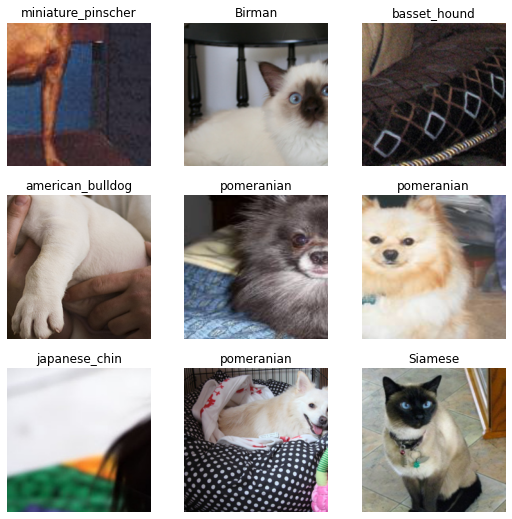

In [4]:
dls.show_batch()

#### Understanding what `get_y` is actually doing

In [5]:
# Step 1: attrgetter

In [6]:
help(attrgetter)

Help on class attrgetter in module operator:

class attrgetter(builtins.object)
 |  attrgetter(attr, ...) --> attrgetter object
 |  
 |  Return a callable object that fetches the given attribute(s) from its operand.
 |  After f = attrgetter('name'), the call f(r) returns r.name.
 |  After g = attrgetter('name', 'date'), the call g(r) returns (r.name, r.date).
 |  After h = attrgetter('name.first', 'name.last'), the call h(r) returns
 |  (r.name.first, r.name.last).
 |  
 |  Methods defined here:
 |  
 |  __call__(self, /, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __reduce__(...)
 |      Return state information for pickling
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type

***Key Takeaway:*** `attrgetter` returns a callable object that fetches the given attribute(s) from its operand.

In [7]:
f = attrgetter("name")

In [8]:
names = L([f(i) for i in files[:10]])
names

(#10) ['pomeranian_81.jpg','British_Shorthair_56.jpg','japanese_chin_102.jpg','scottish_terrier_76.jpg','British_Shorthair_98.jpg','wheaten_terrier_21.jpg','scottish_terrier_102.jpg','British_Shorthair_266.jpg','yorkshire_terrier_44.jpg','Bengal_60.jpg']

In [9]:
names = files[:10].attrgot("name")
names

(#10) ['pomeranian_81.jpg','British_Shorthair_56.jpg','japanese_chin_102.jpg','scottish_terrier_76.jpg','British_Shorthair_98.jpg','wheaten_terrier_21.jpg','scottish_terrier_102.jpg','British_Shorthair_266.jpg','yorkshire_terrier_44.jpg','Bengal_60.jpg']

In [10]:
# Step 2: RegexLabeller

In [11]:
labeller = RegexLabeller(pat=r'^(.*)_\d+.jpg$')
labels = names.map(labeller)
labels

(#10) ['pomeranian','British_Shorthair','japanese_chin','scottish_terrier','British_Shorthair','wheaten_terrier','scottish_terrier','British_Shorthair','yorkshire_terrier','Bengal']

---

## 2. Google Landmark Dataset

Dataset Download Instructions: https://github.com/cvdfoundation/google-landmark

In [54]:
path = download_data("https://s3.amazonaws.com/google-landmark/train/images_000.tar")
path

Path('/home/jupyter/.fastai/archive/images_000.tar')

In [47]:
#untar file manually

In [48]:
path.parent.ls()

(#5) [Path('/home/jupyter/.fastai/archive/0'),Path('/home/jupyter/.fastai/archive/images_000.tar'),Path('/home/jupyter/.fastai/archive/train.csv'),Path('/home/jupyter/.fastai/archive/oxford-iiit-pet.tgz'),Path('/home/jupyter/.fastai/archive/oxford-102-flowers.tgz')]

In [29]:
csv_path = download_data("https://s3.amazonaws.com/google-landmark/metadata/train.csv")
csv_path

Path('/home/jupyter/.fastai/archive/train.csv')

In [30]:
df_train = pd.read_csv(csv_path)
df_train.head()

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons/b/b5/Observatoriet_v%C3%A4derkammer_2013a.jpg,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/6/63/Ecosse200996-1.jpg,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/2/2c/Pirmasens_Dynamikum.jpg,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons/0/02/Occidental_Vertical.jpg,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons/5/51/Looking_downstream_from_the_footbridge_over_the_Severn_-_geograph.org.uk_-_532337.jpg,2474


In [31]:
df_train.drop("url", axis=1, inplace=True)

In [32]:
df_train.head()

,id,landmark_id
0,6e158a47eb2ca3f6,142820
1,202cd79556f30760,104169
2,3ad87684c99c06e1,37914
3,e7f70e9c61e66af3,102140
4,4072182eddd0100e,2474


In [49]:
files = get_image_files(path.parent/'0')
files

(#8266) [Path('/home/jupyter/.fastai/archive/0/0/2/0028dd84a5dc307d.jpg'),Path('/home/jupyter/.fastai/archive/0/0/2/002604b08e7d9169.jpg'),Path('/home/jupyter/.fastai/archive/0/0/2/0024d95487eb0cb1.jpg'),Path('/home/jupyter/.fastai/archive/0/0/2/00275bfc38fb6dcf.jpg'),Path('/home/jupyter/.fastai/archive/0/0/2/0027b34d5fd96c47.jpg'),Path('/home/jupyter/.fastai/archive/0/0/2/002b8756415d9ae2.jpg'),Path('/home/jupyter/.fastai/archive/0/0/2/0023ef8af7eb156d.jpg'),Path('/home/jupyter/.fastai/archive/0/0/2/0024a0022ee0c0e9.jpg'),Path('/home/jupyter/.fastai/archive/0/0/2/002ff92032adaa10.jpg'),Path('/home/jupyter/.fastai/archive/0/0/2/0023b3d25b40b132.jpg')...]

In [50]:
fnames = files.attrgot('stem')
fnames

(#8266) ['0028dd84a5dc307d','002604b08e7d9169','0024d95487eb0cb1','00275bfc38fb6dcf','0027b34d5fd96c47','002b8756415d9ae2','0023ef8af7eb156d','0024a0022ee0c0e9','002ff92032adaa10','0023b3d25b40b132'...]

In [51]:
df_train = df_train[df_train['id'].isin(fnames)].reset_index(drop=True)
df_train.head()

,id,landmark_id
0,0036d78c05c194d9,50089
1,001cd787f1e9a803,61937
2,00429b0a692bc6ec,183170
3,0082fd4214b3c2c7,36407
4,002b386016930458,119649


In [84]:
# debugging get_y
r = Path('/home/jupyter/.fastai/archive/0/0/5/005f72ea10998a8f.jpg')
print(r.stem)
df_train['landmark_id'][df_train['id'] == r.stem].values[0]

005f72ea10998a8f


88553

In [86]:
def get_y(r): 
#     print(r)
    return df_train['landmark_id'][df_train['id'] == r.stem].values[0]

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(seed=42),
                   get_items= get_image_files,
                   get_y= get_y, 
                   item_tfms = Resize(224))
dls = dblock.dataloaders(path.parent/'0') 

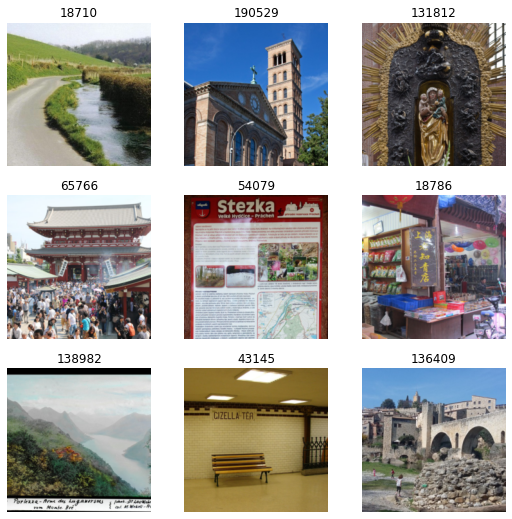

In [77]:
dls.show_batch()

---

## 3. Distracted Driver Detection Dataset

In [87]:
# ! kaggle competitions download -c state-farm-distracted-driver-detection

In [89]:
path = Path('/home/jupyter/distracted-driver-detection')
path.ls()

(#4) [Path('/home/jupyter/distracted-driver-detection/state-farm-distracted-driver-detection.zip'),Path('/home/jupyter/distracted-driver-detection/driver_imgs_list.csv'),Path('/home/jupyter/distracted-driver-detection/imgs'),Path('/home/jupyter/distracted-driver-detection/sample_submission.csv')]

In [91]:
img_path = path/'imgs'
img_path

Path('/home/jupyter/distracted-driver-detection/imgs')

In [92]:
files = get_image_files(img_path)
files

(#102150) [Path('/home/jupyter/distracted-driver-detection/imgs/train/c0/img_45671.jpg'),Path('/home/jupyter/distracted-driver-detection/imgs/train/c0/img_42336.jpg'),Path('/home/jupyter/distracted-driver-detection/imgs/train/c0/img_69059.jpg'),Path('/home/jupyter/distracted-driver-detection/imgs/train/c0/img_97089.jpg'),Path('/home/jupyter/distracted-driver-detection/imgs/train/c0/img_65047.jpg'),Path('/home/jupyter/distracted-driver-detection/imgs/train/c0/img_1256.jpg'),Path('/home/jupyter/distracted-driver-detection/imgs/train/c0/img_65599.jpg'),Path('/home/jupyter/distracted-driver-detection/imgs/train/c0/img_30060.jpg'),Path('/home/jupyter/distracted-driver-detection/imgs/train/c0/img_20144.jpg'),Path('/home/jupyter/distracted-driver-detection/imgs/train/c0/img_20018.jpg')...]

In [95]:
df_train = pd.read_csv(path/"driver_imgs_list.csv")
df_train.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [99]:
labels_dict = {"c0": 'safe driving',
"c1": 'texting - right',
"c2": 'talking on the phone - right',
"c3": 'texting - left',
"c4": 'talking on the phone - left',
"c5": 'operating the radio',
"c6": 'drinking',
"c7": 'reaching behind',
"c8": 'hair and makeup',
"c9": 'talking to passenger'}

In [100]:
df_train['label'] = df_train['classname'].apply(lambda x: labels_dict[x])
df_train.head()

,subject,classname,img,label
0,p002,c0,img_44733.jpg,safe driving
1,p002,c0,img_72999.jpg,safe driving
2,p002,c0,img_25094.jpg,safe driving
3,p002,c0,img_69092.jpg,safe driving
4,p002,c0,img_92629.jpg,safe driving


In [123]:
def get_x(r):
    return path/'imgs'/'train'/r['classname']/r['img']

def get_y(r):
#     return r['classname']
    return r['label']

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   item_tfms=RandomResizedCrop(size=(224,224)), 
                   splitter=RandomSplitter(),
                   get_x = get_x,
#                    get_y=[get_y, labels_dict.__getitem__],
                   get_y=get_y
                  ) 

dls = dblock.dataloaders(df_train)

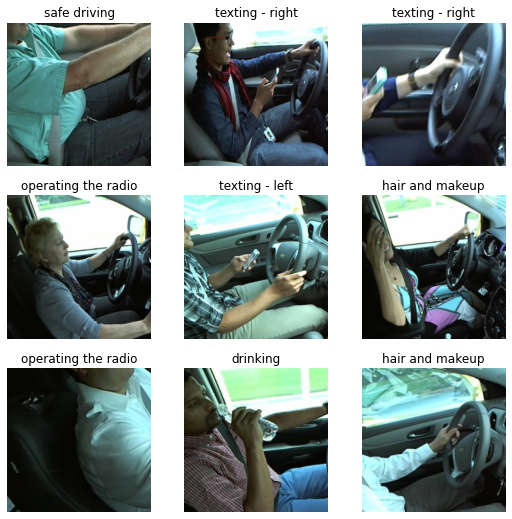

In [124]:
dls.show_batch()

---
---